In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 200
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/baseline_rulebased/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  129.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  135.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  144.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  152.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  252.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  263.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  263.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  272.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  272.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  372.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  372.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  374.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  374.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  376.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  376.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  390.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  390.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  396.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  396.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  402.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  402.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  502.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  502.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  508.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  508.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  508.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 175|reward:  508.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  508.0|last_reward_at:   84|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/76 (0.08)
    explore-remote: 8/105 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 23
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  246.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  257.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  257.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  261.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  261.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  263.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  263.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  272.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  372.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  372.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  378.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  389.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  389.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  397.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  397.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  406.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  406.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  506.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 96|reward:  506.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  512.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  512.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 121|reward:  523.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 121|reward:  523.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  525.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  525.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 178|reward:  534.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 178|reward:  534.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  634.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  634.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  636.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  636.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  636.0|last_reward_at:  200|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/73 (0.11)
    explore-remote: 10/103 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 15
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8687, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  120.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  131.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  131.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  140.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  140.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  146.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  146.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  246.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:  246.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  252.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  252.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  263.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  263.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  272.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  272.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  274.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  274.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  374.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  374.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  388.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  388.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  488.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  488.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  494.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  494.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  500.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  500.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  502.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 131|reward:  502.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 136|reward:  513.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 3|Iteration 136|reward:  513.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  519.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  519.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  521.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  521.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  530.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  530.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 153|reward:  630.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 153|reward:  630.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  641.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  641.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  647.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  647.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  649.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  649.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  649.0|last_reward_at:  173|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/74 (0.12)
    explore-remote: 11/100 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 18
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8535, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  120.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  134.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  134.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  234.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  234.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  240.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  240.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  246.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  246.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  260.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  260.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  360.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  360.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  366.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  380.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  382.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  382.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  390.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 61|reward:  390.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  396.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  396.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  398.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  398.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  498.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  504.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 85|reward:  504.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  510.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  510.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  524.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  524.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  526.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  526.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  626.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  626.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  632.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  632.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  634.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  634.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward:  645.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward:  645.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  651.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 4|Iteration 181|reward:  651.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 186|reward:  659.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 4|Iteration 186|reward:  659.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  659.0|last_reward_at:  186|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/61 (0.14)
    explore-remote: 12/112 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 21
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8386, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   16.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  137.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  137.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  146.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  246.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  246.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  252.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  252.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  263.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  263.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  267.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  267.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  276.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  276.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  376.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  376.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  387.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  387.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  393.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  393.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  395.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  395.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  403.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  403.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  412.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  412.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  512.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  512.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  523.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  523.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 187|reward:  527.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 187|reward:  527.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:  527.0|last_reward_at:  187|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/62 (0.11)
    explore-remote: 9/117 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 27
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8239, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   14.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  120.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  134.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  134.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  234.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  234.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  240.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  240.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  246.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  246.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  263.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  263.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  267.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  267.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  276.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  278.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  278.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  378.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  378.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 106|reward:  392.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 106|reward:  392.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 6|Iteration 108|reward:  492.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 6|Iteration 108|reward:  492.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  498.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  498.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 111|reward:  504.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 111|reward:  504.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 6|Iteration 130|reward:  518.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 6|Iteration 130|reward:  518.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 6|Iteration 131|reward:  618.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 6|Iteration 131|reward:  618.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  620.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  620.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 141|reward:  631.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 141|reward:  631.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  637.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  637.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 161|reward:  645.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 161|reward:  645.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 6|Iteration 174|reward:  647.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 6|Iteration 174|reward:  647.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 6|Iteration 187|reward:  653.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 6|Iteration 187|reward:  653.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward:  653.0|last_reward_at:  187|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/64 (0.12)
    explore-remote: 12/110 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 32
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8096, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   14.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  131.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  131.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  140.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  148.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  148.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  248.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  248.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  254.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  254.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  265.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  265.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  267.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  267.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  271.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  271.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  280.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  280.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:  380.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:  380.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  394.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  394.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 7|Iteration 107|reward:  494.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 7|Iteration 107|reward:  494.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 109|reward:  500.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 109|reward:  500.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 7|Iteration 120|reward:  506.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 7|Iteration 120|reward:  506.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 7|Iteration 155|reward:  517.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 7|Iteration 155|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 7|Iteration 176|reward:  519.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 7|Iteration 176|reward:  519.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  523.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  523.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:  523.0|last_reward_at:  178|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/63 (0.10)
    explore-remote: 10/116 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 34
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7956, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  136.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  238.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  240.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  246.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  246.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  260.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  260.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  264.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  264.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  364.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  364.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  370.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  370.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  381.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  381.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  387.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 44|reward:  387.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  395.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  395.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  401.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  401.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  403.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  403.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 96|reward:  412.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 96|reward:  412.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 8|Iteration 102|reward:  512.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 8|Iteration 102|reward:  512.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:  512.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 8|Iteration 160|reward:  523.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 8|Iteration 160|reward:  523.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 8|Iteration 168|reward:  525.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 8|Iteration 168|reward:  525.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 8|Iteration 184|reward:  534.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 8|Iteration 184|reward:  534.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 8|Iteration 186|reward:  634.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 8|Iteration 186|reward:  634.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  634.0|last_reward_at:  186|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/65 (0.12)
    explore-remote: 9/112 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 36
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7818, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  135.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  252.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  252.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  263.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward:  263.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  265.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  265.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  274.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  274.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  278.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  278.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  378.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  378.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  392.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 94|reward:  392.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 9|Iteration 97|reward:  398.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 9|Iteration 97|reward:  398.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 9|Iteration 98|reward:  404.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 9|Iteration 98|reward:  404.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 9|Iteration 112|reward:  504.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 9|Iteration 112|reward:  504.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 115|reward:  518.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 115|reward:  518.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 9|Iteration 128|reward:  522.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 9|Iteration 128|reward:  522.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 9|Iteration 131|reward:  622.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 9|Iteration 131|reward:  622.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  624.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  624.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 9|Iteration 143|reward:  635.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 9|Iteration 143|reward:  635.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 9|Iteration 149|reward:  643.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 9|Iteration 149|reward:  643.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward:  649.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward:  649.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 153|reward:  655.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 153|reward:  655.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  664.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  664.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 193|reward:  670.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 193|reward:  670.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 9|Iteration 194|reward:  770.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 9|Iteration 194|reward:  770.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  770.0|last_reward_at:  194|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/70 (0.14)
    explore-remote: 12/101 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/0 (1.00)
  exploit deflected to exploration: 31
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7683, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 5|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 8|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 16|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 18|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 22|reward:  137.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 22|reward:  137.0|last_reward_at:   22|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 23|reward:  137.0|last_reward_at:   22|Elapsed Time: 0:00:01||

Episode 10|Iteration 28|reward:  145.0|last_reward_at:   22|Elapsed Time: 0:00:01||

Episode 10|Iteration 28|reward:  145.0|last_reward_at:   28|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 29|reward:  145.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 10|Iteration 55|reward:  154.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 10|Iteration 55|reward:  154.0|last_reward_at:   55|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 56|reward:  154.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 10|Iteration 61|reward:  254.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 10|Iteration 61|reward:  254.0|last_reward_at:   61|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 64|reward:  254.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 10|Iteration 75|reward:  268.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 10|Iteration 75|reward:  268.0|last_reward_at:   75|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 76|reward:  268.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 10|Iteration 79|reward:  272.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 10|Iteration 79|reward:  272.0|last_reward_at:   79|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 80|reward:  278.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 10|Iteration 80|reward:  278.0|last_reward_at:   80|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 81|reward:  278.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 96|reward:  378.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 96|reward:  378.0|last_reward_at:   96|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 97|reward:  378.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 10|Iteration 113|reward:  380.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 10|Iteration 113|reward:  380.0|last_reward_at:  113|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 114|reward:  380.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 10|Iteration 119|reward:  391.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 10|Iteration 119|reward:  391.0|last_reward_at:  119|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 120|reward:  391.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 10|Iteration 122|reward:  400.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 10|Iteration 122|reward:  400.0|last_reward_at:  122|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 123|reward:  400.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 10|Iteration 123|reward:  500.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 10|Iteration 123|reward:  500.0|last_reward_at:  123|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 124|reward:  500.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 10|Iteration 126|reward:  506.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 10|Iteration 126|reward:  506.0|last_reward_at:  126|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 127|reward:  506.0|last_reward_at:  126|Elapsed Time: 0:00:02||

Episode 10|Iteration 138|reward:  517.0|last_reward_at:  126|Elapsed Time: 0:00:02||

Episode 10|Iteration 138|reward:  517.0|last_reward_at:  138|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 139|reward:  517.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 10|Iteration 140|reward:  523.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 10|Iteration 140|reward:  523.0|last_reward_at:  140|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 141|reward:  523.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 10|Iteration 143|reward:  525.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 10|Iteration 143|reward:  525.0|last_reward_at:  143|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 144|reward:  525.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 10|Iteration 144|reward:  529.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 10|Iteration 144|reward:  529.0|last_reward_at:  144|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 145|reward:  529.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 10|Iteration 180|reward:  529.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 10|Iteration 190|reward:  538.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 10|Iteration 190|reward:  538.0|last_reward_at:  190|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 191|reward:  538.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 10|Iteration 200|reward:  638.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 10|Iteration 200|reward:  638.0|last_reward_at:  200|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[ScanBashHistory, ScanExplorerRecentFiles, Sud...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, SudoAttempt, ScanExplorerRec...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 200|reward:  638.0|last_reward_at:  200|Elapsed Time: 0:00:03||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/54 (0.14)
    explore-remote: 10/122 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 30
simulation ended


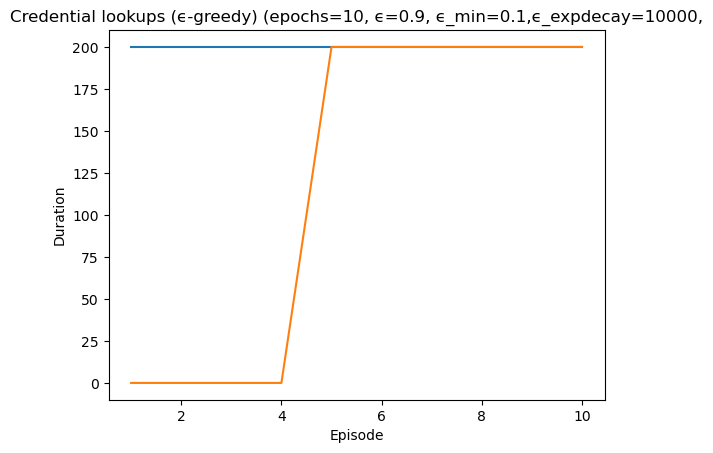

In [8]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache

credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"credlookup-{gymid}"),
    title="Credential lookups (ϵ-greedy)",
)

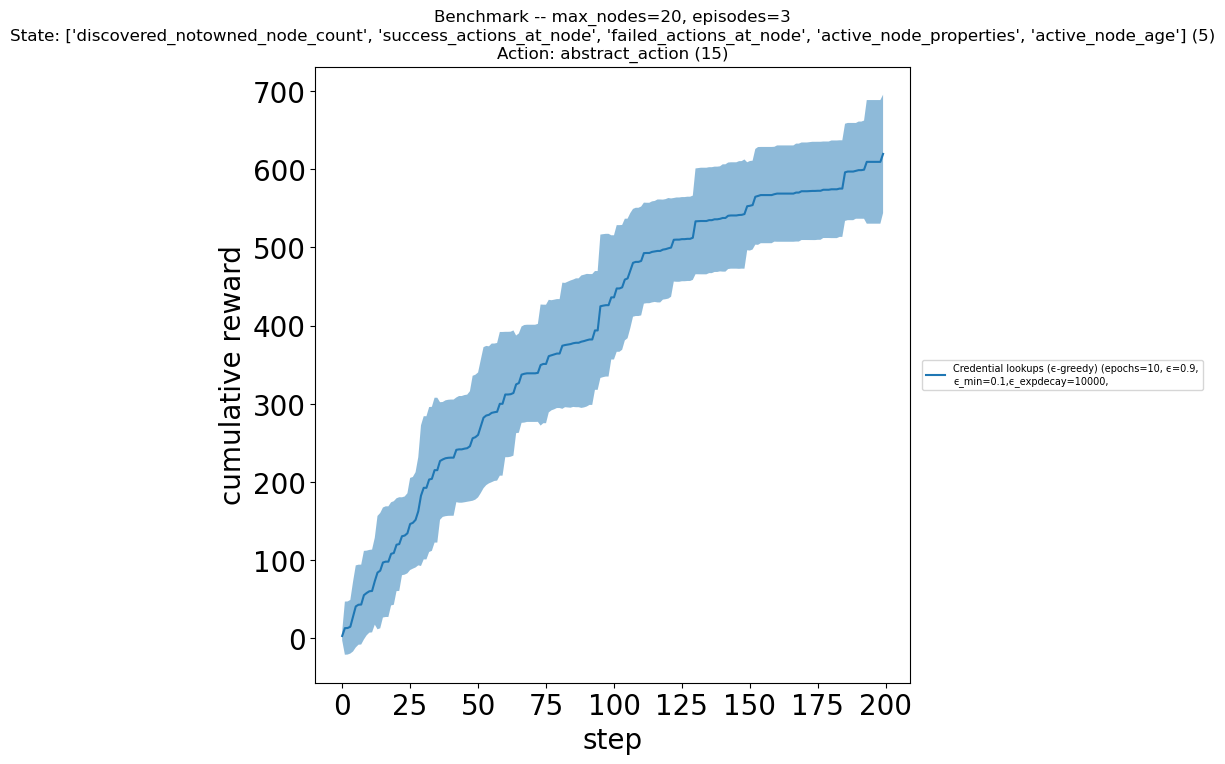

In [9]:
# Compare and plot results for all the agents
all_runs = [
    credlookup_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

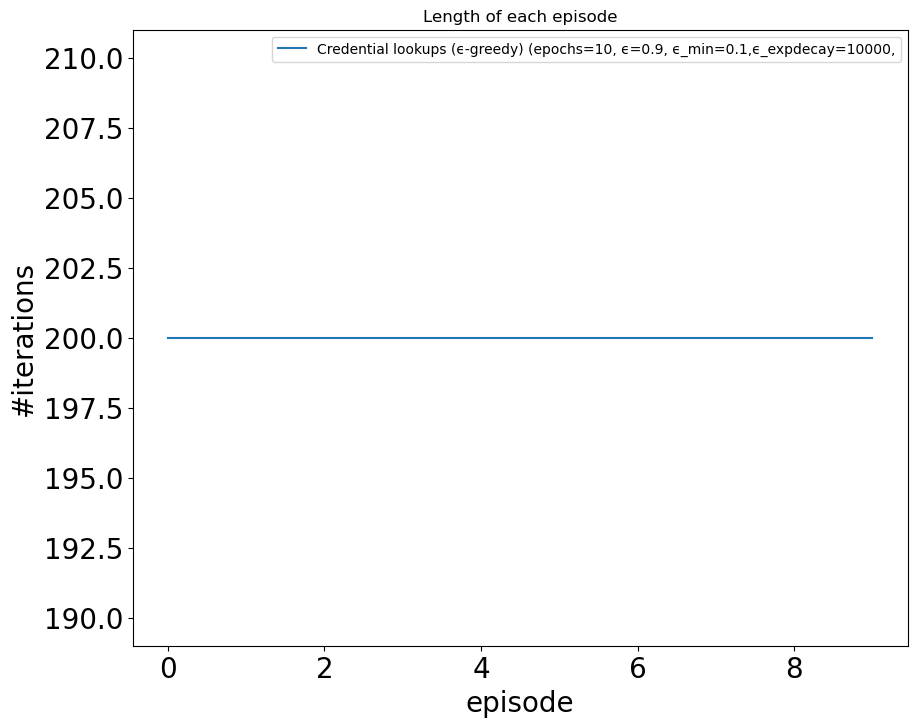

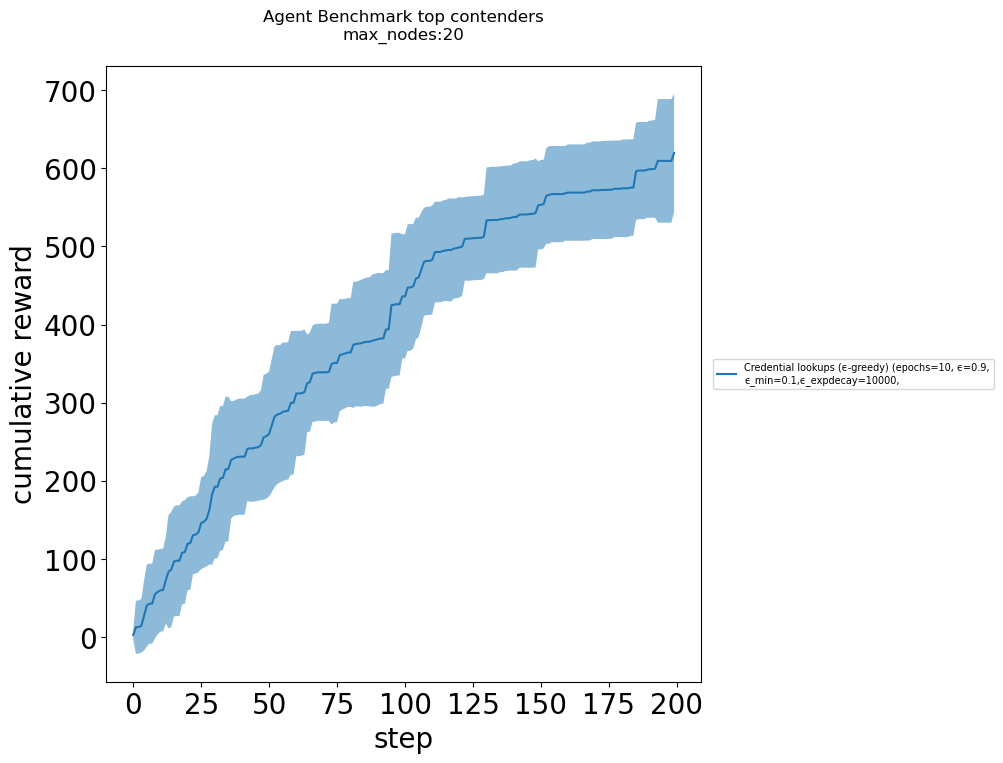

In [10]:
contenders = [credlookup_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

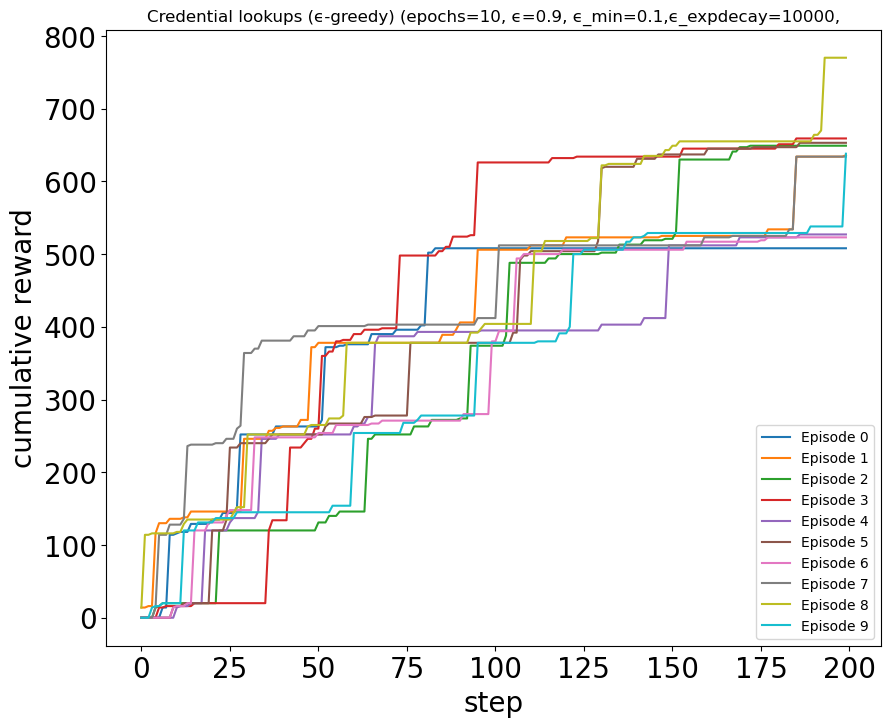

In [11]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)